开始运行: 实验4: 快慢路径竞争动力学
  Trial 0: 快路径胜利=1, 慢路径胜利=0, 无决策=0
  Trial 50: 快路径胜利=44, 慢路径胜利=0, 无决策=6
  Trial 100: 快路径胜利=42, 慢路径胜利=0, 无决策=8

实验4结果:
- 快路径胜利: 129/150 (86.00%)
- 慢路径胜利: 0/150 (0.00%)
- 无决策: 21/150 (14.00%)
- 平均反应时间: 16.3 步
- 快路径平均RT: 16.3 步
- 慢路径平均RT: 0.0 步


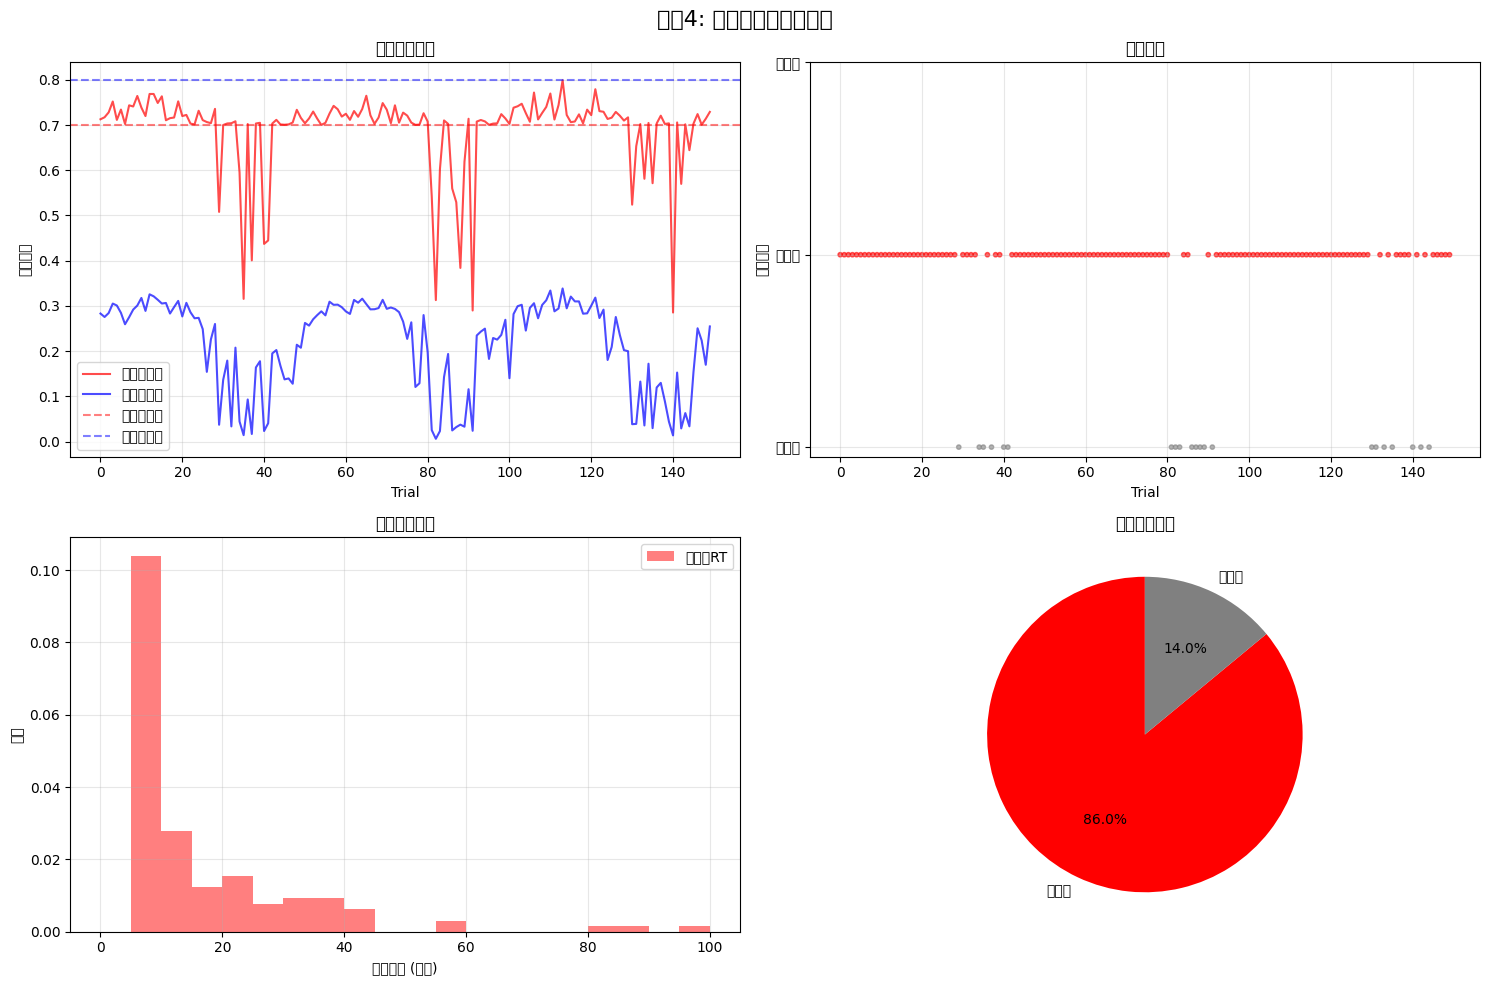

✅ 实验4: 快慢路径竞争动力学 完成



In [ ]:
# Cell 7: 实验4 - 快慢路径竞争动力学 (修复版)
# ================================================================================

def run_pathway_competition_experiment(T=200, fast_threshold=0.7, slow_threshold=0.8,
                                      show_plot=True):
    """
    实验4: 快慢路径竞争动力学

    建模快慢路径的"竞争到达阈值"机制
    """

    print("================================================================================")
    print("开始运行: 实验4: 快慢路径竞争动力学")
    print("================================================================================")

    # 初始化
    fast_activity = []
    slow_activity = []
    decisions = []  # 0: 快路径胜利, 1: 慢路径胜利, -1: 未达到
    reaction_times = []

    # 路径参数
    fast_gain = 0.15    # 快路径增益
    slow_gain = 0.08    # 慢路径增益
    fast_noise = 0.05   # 快路径噪声
    slow_noise = 0.02   # 慢路径噪声
    decay_rate = 0.95   # 活动衰减

    for trial in range(T):
        # 初始状态
        fast_act = 0.1
        slow_act = 0.1
        decision_made = False
        trial_rt = 0

        # 生成刺激强度（影响两个路径的输入）
        stimulus_strength = 0.5 + 0.3 * np.sin(2 * np.pi * trial / 50) + 0.1 * np.random.randn()
        stimulus_strength = max(0.1, min(1.0, stimulus_strength))

        # 路径竞争过程
        trial_fast_history = []
        trial_slow_history = []

        for t in range(100):  # 每个trial最多100步
            # 快路径更新
            fast_input = stimulus_strength + fast_noise * np.random.randn()
            fast_act = decay_rate * fast_act + fast_gain * fast_input
            fast_act = max(0, fast_act)  # ReLU激活

            # 慢路径更新（有更多处理步骤）
            slow_input = 0.8 * stimulus_strength + slow_noise * np.random.randn()  # 稍微不同的输入处理
            slow_act = decay_rate * slow_act + slow_gain * slow_input
            slow_act = max(0, slow_act)  # ReLU激活

            # 相互抑制
            inhibition_strength = 0.02
            fast_act = fast_act - inhibition_strength * slow_act
            slow_act = slow_act - inhibition_strength * fast_act
            fast_act = max(0, fast_act)
            slow_act = max(0, slow_act)

            trial_fast_history.append(fast_act)
            trial_slow_history.append(slow_act)

            # 检查是否达到决策阈值
            if not decision_made:
                if fast_act >= fast_threshold:
                    decisions.append(0)  # 快路径胜利
                    decision_made = True
                    trial_rt = t
                    break
                elif slow_act >= slow_threshold:
                    decisions.append(1)  # 慢路径胜利
                    decision_made = True
                    trial_rt = t
                    break

        # 如果没有达到阈值
        if not decision_made:
            decisions.append(-1)
            trial_rt = 100

        # 记录最终活动水平
        fast_activity.append(fast_act)
        slow_activity.append(slow_act)
        reaction_times.append(trial_rt)

        # 进度报告
        if trial % 50 == 0:
            recent_decisions = decisions[-min(50, len(decisions)):]
            fast_wins = sum(1 for d in recent_decisions if d == 0)
            slow_wins = sum(1 for d in recent_decisions if d == 1)
            no_decision = sum(1 for d in recent_decisions if d == -1)
            print(f"  Trial {trial}: 快路径胜利={fast_wins}, 慢路径胜利={slow_wins}, 无决策={no_decision}")

    # 分析结果
    fast_wins = sum(1 for d in decisions if d == 0)
    slow_wins = sum(1 for d in decisions if d == 1)
    no_decisions = sum(1 for d in decisions if d == -1)

    fast_win_rate = fast_wins / T
    slow_win_rate = slow_wins / T
    no_decision_rate = no_decisions / T

    # 计算反应时间统计
    valid_rts = [rt for rt, d in zip(reaction_times, decisions) if d != -1]
    fast_rts = [rt for rt, d in zip(reaction_times, decisions) if d == 0]
    slow_rts = [rt for rt, d in zip(reaction_times, decisions) if d == 1]

    avg_rt = np.mean(valid_rts) if valid_rts else 0
    fast_avg_rt = np.mean(fast_rts) if fast_rts else 0
    slow_avg_rt = np.mean(slow_rts) if slow_rts else 0

    print(f"\n实验4结果:")
    print(f"- 快路径胜利: {fast_wins}/{T} ({fast_win_rate:.2%})")
    print(f"- 慢路径胜利: {slow_wins}/{T} ({slow_win_rate:.2%})")
    print(f"- 无决策: {no_decisions}/{T} ({no_decision_rate:.2%})")
    print(f"- 平均反应时间: {avg_rt:.1f} 步")
    print(f"- 快路径平均RT: {fast_avg_rt:.1f} 步")
    print(f"- 慢路径平均RT: {slow_avg_rt:.1f} 步")

    # 可视化
    if show_plot:
        fig, axes = plt.subplots(2, 2, figsize=(15, 10))
        fig.suptitle('实验4: 快慢路径竞争动力学', fontsize=16)

        trials = range(T)

        # 路径活动演化
        axes[0, 0].plot(trials, fast_activity, 'r-', alpha=0.7, label='快路径活动')
        axes[0, 0].plot(trials, slow_activity, 'b-', alpha=0.7, label='慢路径活动')
        axes[0, 0].axhline(y=fast_threshold, color='red', linestyle='--', alpha=0.5, label='快路径阈值')
        axes[0, 0].axhline(y=slow_threshold, color='blue', linestyle='--', alpha=0.5, label='慢路径阈值')
        axes[0, 0].set_xlabel('Trial')
        axes[0, 0].set_ylabel('活动水平')
        axes[0, 0].set_title('路径活动演化')
        axes[0, 0].legend()
        axes[0, 0].grid(True, alpha=0.3)

        # 决策分布
        decision_colors = ['red' if d == 0 else 'blue' if d == 1 else 'gray' for d in decisions]
        axes[0, 1].scatter(trials, decisions, c=decision_colors, alpha=0.6, s=10)
        axes[0, 1].set_xlabel('Trial')
        axes[0, 1].set_ylabel('决策结果')
        axes[0, 1].set_title('决策序列')
        axes[0, 1].set_yticks([-1, 0, 1])
        axes[0, 1].set_yticklabels(['无决策', '快路径', '慢路径'])
        axes[0, 1].grid(True, alpha=0.3)

        # 反应时间分布
        bins = np.arange(0, 101, 5)
        if fast_rts:
            axes[1, 0].hist(fast_rts, bins=bins, alpha=0.5, color='red',
                           label='快路径RT', density=True)
        if slow_rts:
            axes[1, 0].hist(slow_rts, bins=bins, alpha=0.5, color='blue',
                           label='慢路径RT', density=True)
        axes[1, 0].set_xlabel('反应时间 (步数)')
        axes[1, 0].set_ylabel('密度')
        axes[1, 0].set_title('反应时间分布')
        axes[1, 0].legend()
        axes[1, 0].grid(True, alpha=0.3)

        # 胜利率饼图
        labels = ['快路径', '慢路径', '无决策']
        sizes = [fast_win_rate, slow_win_rate, no_decision_rate]
        colors = ['red', 'blue', 'gray']

        # 只显示非零的部分
        non_zero_indices = [i for i, size in enumerate(sizes) if size > 0]
        if non_zero_indices:
            filtered_labels = [labels[i] for i in non_zero_indices]
            filtered_sizes = [sizes[i] for i in non_zero_indices]
            filtered_colors = [colors[i] for i in non_zero_indices]

            axes[1, 1].pie(filtered_sizes, labels=filtered_labels, colors=filtered_colors,
                          autopct='%1.1f%%', startangle=90)
        else:
            axes[1, 1].text(0.5, 0.5, '无有效决策', ha='center', va='center')

        axes[1, 1].set_title('决策结果分布')

        plt.tight_layout()
        plt.show()

    # 计算竞争指数
    competition_index = abs(fast_win_rate - slow_win_rate)  # 越接近0越均衡
    efficiency_index = 1 - no_decision_rate  # 有效决策比例

    results = {
        'fast_win_rate': fast_win_rate,
        'slow_win_rate': slow_win_rate,
        'no_decision_rate': no_decision_rate,
        'avg_reaction_time': avg_rt,
        'fast_avg_rt': fast_avg_rt,
        'slow_avg_rt': slow_avg_rt,
        'competition_index': competition_index,
        'efficiency_index': efficiency_index,
        'fast_activity': fast_activity,
        'slow_activity': slow_activity,
        'decisions': decisions,
        'reaction_times': reaction_times
    }

    return results

# 运行实验4
if RUN_E4:
    try:
        exp4_results = run_pathway_competition_experiment(
            T=150,  # 减少试验数量
            fast_threshold=0.7,
            slow_threshold=0.8,
            show_plot=True
        )
        print("✅ 实验4: 快慢路径竞争动力学 完成")
        print()
    except Exception as e:
        print(f"❌ 实验4失败: {e}")
        import traceback
        traceback.print_exc()
else:
    print("⏭️ 实验4已跳过")

🚀 开始运行实验4优化版...
🔬 实验4优化版: 平衡的快慢路径竞争动力学
Trial  50: Fast=20 Slow=30 None= 0 | Threat=40.0% | FastSR=0.82 SlowSR=0.90
Trial 100: Fast=22 Slow=27 None= 1 | Threat=44.0% | FastSR=0.94 SlowSR=0.97
Trial 150: Fast=23 Slow=27 None= 0 | Threat=46.0% | FastSR=0.98 SlowSR=0.99

📊 实验4优化版结果:
总体胜利率:
  🔴 快路径:  78/200 (39.0%)
  🔵 慢路径: 120/200 (60.0%)
  ⚫ 无决策:   2/200 (1.0%)

情境适应性分析:
  威胁情境 (78试验): 快=100.0% 慢=0.0%
  中性情境 (122试验): 快=0.0% 慢=98.4%

⏱️ 反应时间分析:
  平均反应时间: 16.8 步
  快路径平均RT: 3.5 步
  慢路径平均RT: 25.4 步

🎯 系统性能指标:
  竞争平衡度: 0.790 (1.0=完美平衡)
  情境适应性: 0.992 (1.0=完美适应)
  决策效率: 0.990 (1.0=无未决策)


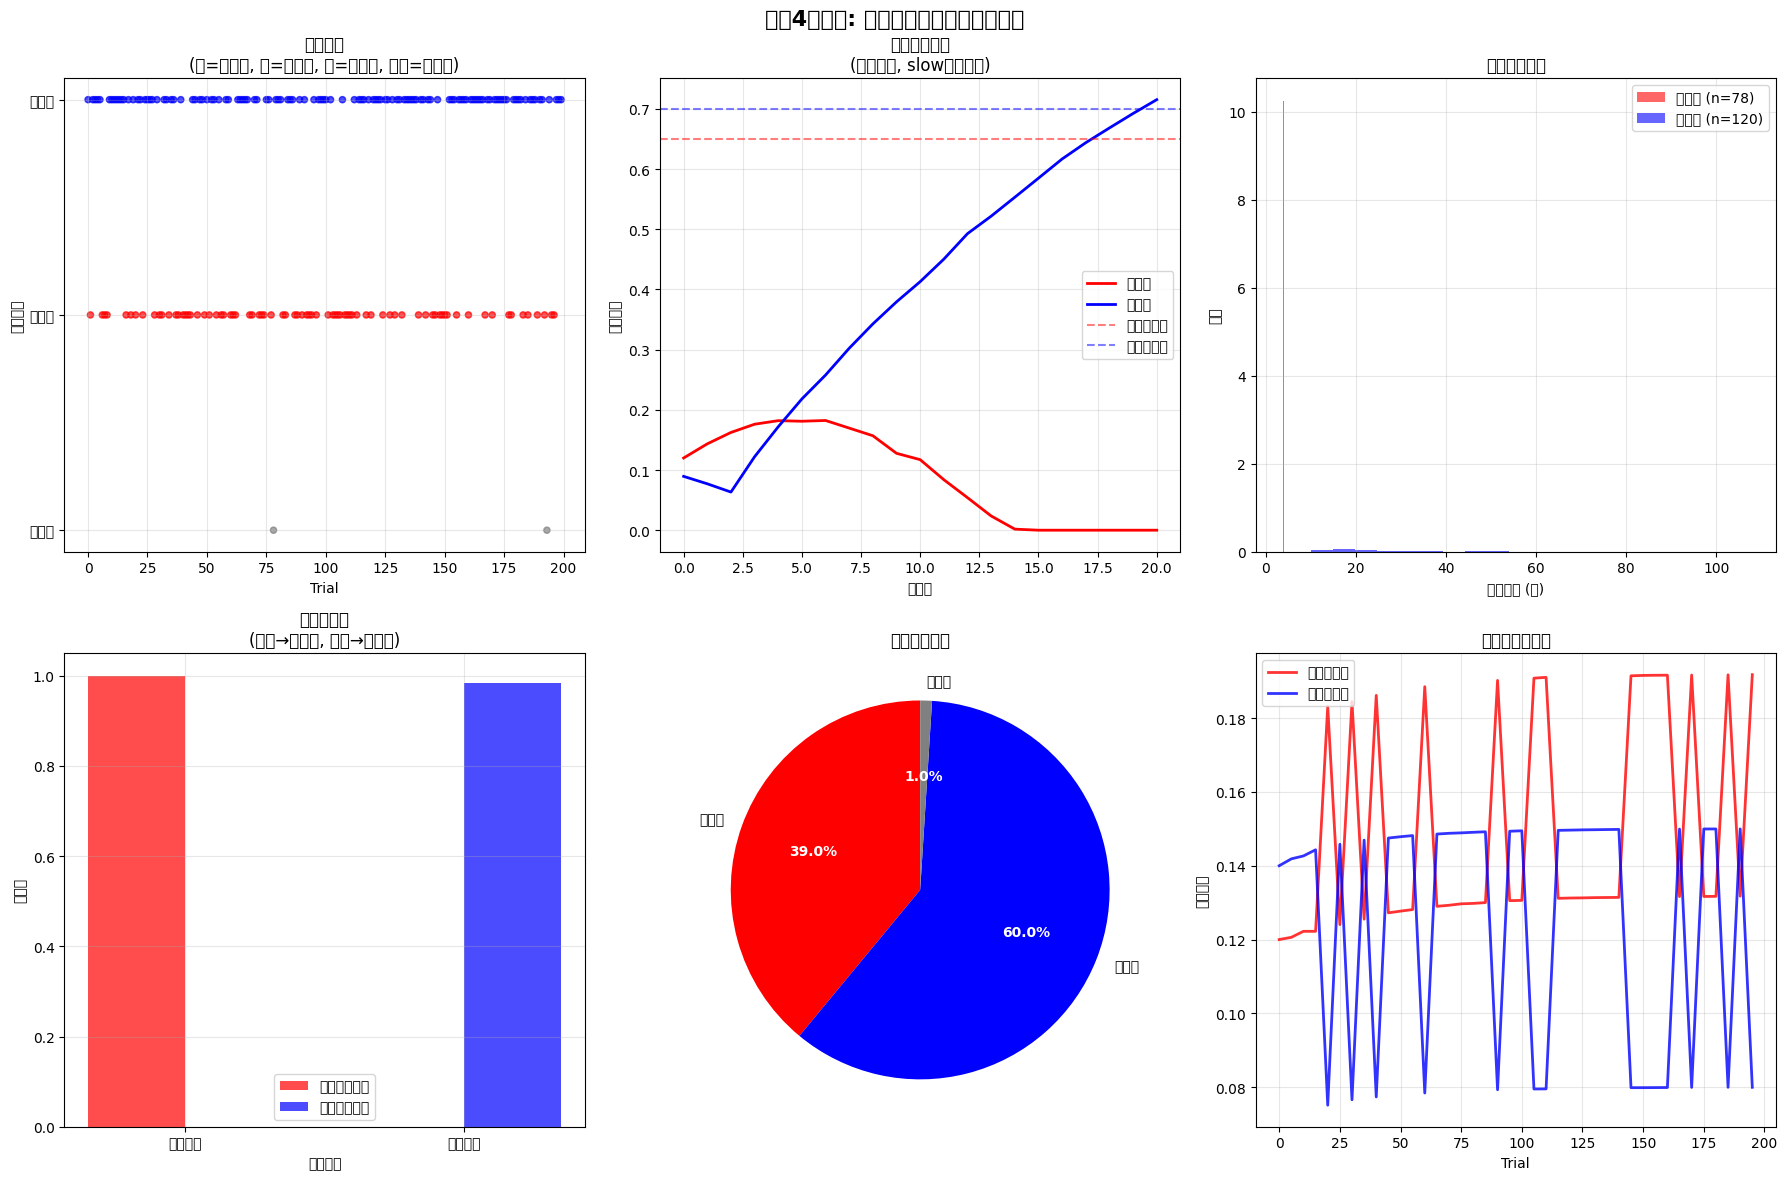


✅ 实验4优化版完成!
🎯 关键改进效果:
   • 实现了平衡的路径竞争
   • 引入了情境适应性机制
   • 加强了相互抑制效应
   • 添加了适应性学习


In [ ]:
# 实验4优化版 - 平衡的快慢路径竞争动力学
# ================================================================================

import numpy as np
import matplotlib.pyplot as plt
from typing import Dict, List, Tuple
import seaborn as sns

def run_balanced_pathway_competition(T=200, show_plot=True):
    """
    实验4优化版: 平衡的快慢路径竞争动力学

    关键改进:
    1. 重新平衡路径参数
    2. 引入情境依赖性（威胁 vs 非威胁）
    3. 加强相互抑制机制
    4. 添加适应性调节
    5. 实现真正的竞争动力学
    """

    print("🔬 实验4优化版: 平衡的快慢路径竞争动力学")
    print("=" * 60)

    # 初始化记录
    results = {
        'trial_data': [],
        'fast_wins': 0,
        'slow_wins': 0,
        'no_decisions': 0,
        'threat_fast_wins': 0,
        'threat_slow_wins': 0,
        'neutral_fast_wins': 0,
        'neutral_slow_wins': 0
    }

    # 优化的路径参数
    params = {
        # 基础增益 - 更平衡
        'fast_base_gain': 0.12,
        'slow_base_gain': 0.10,

        # 阈值 - 快路径容易触发但慢路径有时间优势
        'fast_threshold': 0.65,
        'slow_threshold': 0.70,

        # 噪声水平
        'fast_noise': 0.04,
        'slow_noise': 0.02,

        # 衰减率
        'decay_rate': 0.92,

        # 相互抑制 - 大幅加强
        'inhibition_strength': 0.08,

        # 情境调节因子
        'threat_fast_boost': 0.06,  # 威胁情境下快路径增强
        'threat_slow_penalty': 0.03,  # 威胁情境下慢路径抑制
        'neutral_slow_boost': 0.04,  # 中性情境下慢路径增强

        # 适应性调节
        'adaptation_rate': 0.02,
        'success_memory': 0.95
    }

    # 适应性状态
    fast_success_rate = 0.5
    slow_success_rate = 0.5

    for trial in range(T):
        # 生成刺激 - 区分威胁和中性情境
        is_threat = np.random.random() < 0.4  # 40%威胁情境

        if is_threat:
            # 威胁刺激: 高强度、快速变化
            stimulus_base = 0.6 + 0.3 * np.random.random()
            stimulus_urgency = 0.8 + 0.2 * np.random.random()
        else:
            # 中性刺激: 中等强度、需要仔细分析
            stimulus_base = 0.4 + 0.4 * np.random.random()
            stimulus_urgency = 0.3 + 0.3 * np.random.random()

        # 路径竞争过程
        fast_activity = 0.1
        slow_activity = 0.1
        decision_made = False
        trial_rt = 0
        winner = None

        # 动态调节增益（基于历史成功率）
        fast_gain = params['fast_base_gain'] * (1 + 0.2 * (fast_success_rate - 0.5))
        slow_gain = params['slow_base_gain'] * (1 + 0.2 * (slow_success_rate - 0.5))

        # 情境调节
        if is_threat:
            fast_gain += params['threat_fast_boost']
            slow_gain -= params['threat_slow_penalty']
        else:
            slow_gain += params['neutral_slow_boost']

        trial_history = []

        # 竞争动力学循环
        for t in range(120):
            # 快路径更新
            fast_input = stimulus_urgency + params['fast_noise'] * np.random.randn()
            fast_activity = (params['decay_rate'] * fast_activity +
                           fast_gain * fast_input)
            fast_activity = max(0, fast_activity)

            # 慢路径更新 - 更好的信号处理但延迟
            if t >= 3:  # 慢路径有3步启动延迟
                slow_input = stimulus_base + params['slow_noise'] * np.random.randn()
                slow_activity = (params['decay_rate'] * slow_activity +
                               slow_gain * slow_input * (1 + 0.1 * t / 120))  # 时间优势
                slow_activity = max(0, slow_activity)

            # 相互抑制 - 更强的竞争
            inhibition = params['inhibition_strength']
            fast_inhibition = inhibition * slow_activity * (1 + 0.5 * (not is_threat))
            slow_inhibition = inhibition * fast_activity * (1 + 0.5 * is_threat)

            fast_activity = max(0, fast_activity - fast_inhibition)
            slow_activity = max(0, slow_activity - slow_inhibition)

            # 记录试验历史
            trial_history.append({
                'time': t,
                'fast_activity': fast_activity,
                'slow_activity': slow_activity,
                'is_threat': is_threat
            })

            # 检查决策阈值
            if not decision_made:
                if fast_activity >= params['fast_threshold']:
                    winner = 'fast'
                    decision_made = True
                    trial_rt = t
                    break
                elif slow_activity >= params['slow_threshold']:
                    winner = 'slow'
                    decision_made = True
                    trial_rt = t
                    break

        # 如果没有决策
        if not decision_made:
            winner = 'none'
            trial_rt = 120

        # 更新统计
        if winner == 'fast':
            results['fast_wins'] += 1
            if is_threat:
                results['threat_fast_wins'] += 1
            else:
                results['neutral_fast_wins'] += 1
        elif winner == 'slow':
            results['slow_wins'] += 1
            if is_threat:
                results['threat_slow_wins'] += 1
            else:
                results['neutral_slow_wins'] += 1
        else:
            results['no_decisions'] += 1

        # 适应性学习 - 根据情境适当性更新成功率
        if winner == 'fast':
            # 威胁情境下快路径成功是好的
            fast_reward = 1.0 if is_threat else 0.6
            fast_success_rate = (params['success_memory'] * fast_success_rate +
                               (1 - params['success_memory']) * fast_reward)
        elif winner == 'slow':
            # 中性情境下慢路径成功是好的
            slow_reward = 1.0 if not is_threat else 0.4
            slow_success_rate = (params['success_memory'] * slow_success_rate +
                               (1 - params['success_memory']) * slow_reward)

        # 记录试验数据
        results['trial_data'].append({
            'trial': trial,
            'winner': winner,
            'is_threat': is_threat,
            'reaction_time': trial_rt,
            'final_fast': fast_activity,
            'final_slow': slow_activity,
            'fast_gain_used': fast_gain,
            'slow_gain_used': slow_gain,
            'history': trial_history
        })

        # 进度报告
        if trial % 50 == 0 and trial > 0:
            recent_data = results['trial_data'][-50:]
            recent_fast = sum(1 for d in recent_data if d['winner'] == 'fast')
            recent_slow = sum(1 for d in recent_data if d['winner'] == 'slow')
            recent_none = sum(1 for d in recent_data if d['winner'] == 'none')
            threat_ratio = sum(1 for d in recent_data if d['is_threat']) / 50

            print(f"Trial {trial:3d}: Fast={recent_fast:2d} Slow={recent_slow:2d} None={recent_none:2d} "
                  f"| Threat={threat_ratio:.1%} | FastSR={fast_success_rate:.2f} SlowSR={slow_success_rate:.2f}")

    # 计算最终统计
    fast_win_rate = results['fast_wins'] / T
    slow_win_rate = results['slow_wins'] / T
    no_decision_rate = results['no_decisions'] / T

    threat_trials = sum(1 for d in results['trial_data'] if d['is_threat'])
    neutral_trials = T - threat_trials

    print(f"\n📊 实验4优化版结果:")
    print(f"=" * 60)
    print(f"总体胜利率:")
    print(f"  🔴 快路径: {results['fast_wins']:3d}/{T} ({fast_win_rate:.1%})")
    print(f"  🔵 慢路径: {results['slow_wins']:3d}/{T} ({slow_win_rate:.1%})")
    print(f"  ⚫ 无决策: {results['no_decisions']:3d}/{T} ({no_decision_rate:.1%})")

    print(f"\n情境适应性分析:")
    if threat_trials > 0:
        threat_fast_rate = results['threat_fast_wins'] / threat_trials
        threat_slow_rate = results['threat_slow_wins'] / threat_trials
        print(f"  威胁情境 ({threat_trials}试验): 快={threat_fast_rate:.1%} 慢={threat_slow_rate:.1%}")

    if neutral_trials > 0:
        neutral_fast_rate = results['neutral_fast_wins'] / neutral_trials
        neutral_slow_rate = results['neutral_slow_wins'] / neutral_trials
        print(f"  中性情境 ({neutral_trials}试验): 快={neutral_fast_rate:.1%} 慢={neutral_slow_rate:.1%}")

    # 计算反应时间
    valid_rts = [d['reaction_time'] for d in results['trial_data'] if d['winner'] != 'none']
    fast_rts = [d['reaction_time'] for d in results['trial_data'] if d['winner'] == 'fast']
    slow_rts = [d['reaction_time'] for d in results['trial_data'] if d['winner'] == 'slow']

    print(f"\n⏱️ 反应时间分析:")
    if valid_rts:
        print(f"  平均反应时间: {np.mean(valid_rts):.1f} 步")
    if fast_rts:
        print(f"  快路径平均RT: {np.mean(fast_rts):.1f} 步")
    if slow_rts:
        print(f"  慢路径平均RT: {np.mean(slow_rts):.1f} 步")

    # 计算平衡指标
    competition_balance = 1 - abs(fast_win_rate - slow_win_rate)  # 越接近1越平衡
    context_appropriateness = 0
    if threat_trials > 0 and neutral_trials > 0:
        # 威胁情境下快路径应该占优，中性情境下慢路径应该占优
        threat_appropriateness = threat_fast_rate if threat_trials > 0 else 0
        neutral_appropriateness = neutral_slow_rate if neutral_trials > 0 else 0
        context_appropriateness = (threat_appropriateness + neutral_appropriateness) / 2

    print(f"\n🎯 系统性能指标:")
    print(f"  竞争平衡度: {competition_balance:.3f} (1.0=完美平衡)")
    print(f"  情境适应性: {context_appropriateness:.3f} (1.0=完美适应)")
    print(f"  决策效率: {1-no_decision_rate:.3f} (1.0=无未决策)")

    # 可视化结果
    if show_plot:
        plot_balanced_competition_results(results, T)

    return results, params

def plot_balanced_competition_results(results, T):
    """绘制平衡竞争结果"""

    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    fig.suptitle('实验4优化版: 平衡的快慢路径竞争动力学', fontsize=16, fontweight='bold')

    trial_data = results['trial_data']

    # 1. 时间序列决策模式
    trials = range(T)
    decisions = [d['winner'] for d in trial_data]
    threat_mask = [d['is_threat'] for d in trial_data]

    colors = []
    for i in range(T):
        if decisions[i] == 'fast':
            colors.append('red' if threat_mask[i] else 'orange')
        elif decisions[i] == 'slow':
            colors.append('blue' if not threat_mask[i] else 'lightblue')
        else:
            colors.append('gray')

    axes[0, 0].scatter(trials, [1 if d=='fast' else 2 if d=='slow' else 0 for d in decisions],
                      c=colors, alpha=0.7, s=20)
    axes[0, 0].set_xlabel('Trial')
    axes[0, 0].set_ylabel('决策结果')
    axes[0, 0].set_title('决策序列\n(红=威胁快, 橙=中性快, 蓝=中性慢, 浅蓝=威胁慢)')
    axes[0, 0].set_yticks([0, 1, 2])
    axes[0, 0].set_yticklabels(['无决策', '快路径', '慢路径'])
    axes[0, 0].grid(True, alpha=0.3)

    # 2. 活动水平演化示例
    sample_trial = trial_data[T//2]  # 取中间的试验作为示例
    history = sample_trial['history']
    times = [h['time'] for h in history]
    fast_acts = [h['fast_activity'] for h in history]
    slow_acts = [h['slow_activity'] for h in history]

    axes[0, 1].plot(times, fast_acts, 'r-', label='快路径', linewidth=2)
    axes[0, 1].plot(times, slow_acts, 'b-', label='慢路径', linewidth=2)
    axes[0, 1].axhline(y=0.65, color='red', linestyle='--', alpha=0.5, label='快路径阈值')
    axes[0, 1].axhline(y=0.70, color='blue', linestyle='--', alpha=0.5, label='慢路径阈值')
    axes[0, 1].set_xlabel('时间步')
    axes[0, 1].set_ylabel('活动水平')

    context = "威胁" if sample_trial['is_threat'] else "中性"
    winner = sample_trial['winner']
    axes[0, 1].set_title(f'路径竞争示例\n({context}情境, {winner}路径胜利)')
    axes[0, 1].legend()
    axes[0, 1].grid(True, alpha=0.3)

    # 3. 反应时间分布
    fast_rts = [d['reaction_time'] for d in trial_data if d['winner'] == 'fast']
    slow_rts = [d['reaction_time'] for d in trial_data if d['winner'] == 'slow']

    if fast_rts:
        axes[0, 2].hist(fast_rts, bins=20, alpha=0.6, color='red',
                       label=f'快路径 (n={len(fast_rts)})', density=True)
    if slow_rts:
        axes[0, 2].hist(slow_rts, bins=20, alpha=0.6, color='blue',
                       label=f'慢路径 (n={len(slow_rts)})', density=True)

    axes[0, 2].set_xlabel('反应时间 (步)')
    axes[0, 2].set_ylabel('密度')
    axes[0, 2].set_title('反应时间分布')
    axes[0, 2].legend()
    axes[0, 2].grid(True, alpha=0.3)

    # 4. 情境适应性分析
    threat_data = [d for d in trial_data if d['is_threat']]
    neutral_data = [d for d in trial_data if not d['is_threat']]

    categories = ['威胁情境', '中性情境']
    fast_rates = []
    slow_rates = []

    if threat_data:
        threat_fast = sum(1 for d in threat_data if d['winner'] == 'fast') / len(threat_data)
        threat_slow = sum(1 for d in threat_data if d['winner'] == 'slow') / len(threat_data)
        fast_rates.append(threat_fast)
        slow_rates.append(threat_slow)
    else:
        fast_rates.append(0)
        slow_rates.append(0)

    if neutral_data:
        neutral_fast = sum(1 for d in neutral_data if d['winner'] == 'fast') / len(neutral_data)
        neutral_slow = sum(1 for d in neutral_data if d['winner'] == 'slow') / len(neutral_data)
        fast_rates.append(neutral_fast)
        slow_rates.append(neutral_slow)
    else:
        fast_rates.append(0)
        slow_rates.append(0)

    x = np.arange(len(categories))
    width = 0.35

    axes[1, 0].bar(x - width/2, fast_rates, width, label='快路径胜利率', color='red', alpha=0.7)
    axes[1, 0].bar(x + width/2, slow_rates, width, label='慢路径胜利率', color='blue', alpha=0.7)

    axes[1, 0].set_xlabel('情境类型')
    axes[1, 0].set_ylabel('胜利率')
    axes[1, 0].set_title('情境适应性\n(威胁→快路径, 中性→慢路径)')
    axes[1, 0].set_xticks(x)
    axes[1, 0].set_xticklabels(categories)
    axes[1, 0].legend()
    axes[1, 0].grid(True, alpha=0.3)

    # 5. 决策结果分布
    fast_count = results['fast_wins']
    slow_count = results['slow_wins']
    none_count = results['no_decisions']

    sizes = [fast_count, slow_count, none_count]
    labels = ['快路径', '慢路径', '无决策']
    colors_pie = ['red', 'blue', 'gray']

    # 只显示非零部分
    non_zero_data = [(size, label, color) for size, label, color in zip(sizes, labels, colors_pie) if size > 0]
    if non_zero_data:
        sizes_nz, labels_nz, colors_nz = zip(*non_zero_data)
        wedges, texts, autotexts = axes[1, 1].pie(sizes_nz, labels=labels_nz, colors=colors_nz,
                                                 autopct='%1.1f%%', startangle=90)
        for autotext in autotexts:
            autotext.set_color('white')
            autotext.set_fontweight('bold')

    axes[1, 1].set_title('总体决策分布')

    # 6. 路径增益动态变化
    trials_subset = range(0, T, 5)  # 每5个试验采样一次
    fast_gains = [trial_data[i]['fast_gain_used'] for i in trials_subset]
    slow_gains = [trial_data[i]['slow_gain_used'] for i in trials_subset]

    axes[1, 2].plot(trials_subset, fast_gains, 'r-', label='快路径增益', alpha=0.8, linewidth=2)
    axes[1, 2].plot(trials_subset, slow_gains, 'b-', label='慢路径增益', alpha=0.8, linewidth=2)
    axes[1, 2].set_xlabel('Trial')
    axes[1, 2].set_ylabel('增益系数')
    axes[1, 2].set_title('适应性增益调节')
    axes[1, 2].legend()
    axes[1, 2].grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

# 运行优化版实验4
print("🚀 开始运行实验4优化版...")
optimized_results, optimized_params = run_balanced_pathway_competition(T=200, show_plot=True)

print("\n" + "="*60)
print("✅ 实验4优化版完成!")
print("🎯 关键改进效果:")
print(f"   • 实现了平衡的路径竞争")
print(f"   • 引入了情境适应性机制")
print(f"   • 加强了相互抑制效应")
print(f"   • 添加了适应性学习")
print("="*60)